<a href="https://colab.research.google.com/github/sanavalos/birthday-problem/blob/main/Birthday_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Birthday Problem

In probability theory, the birthday problem asks for the probability that, in a set of n randomly chosen people, at least two will share a birthday. The birthday paradox refers to the counterintuitive fact that only 23 people are needed for that probability to exceed 50%.

### Simulation
Simulation based on 𝒩=1000 repetitions to estimate the probability that at least two people in a group of 𝒦 randomly chosen people share the same birthday. Providing a list of estimated probabilities as a function of 𝒦 for 𝒦 ranging from 1 to 50. Representing these estimated probabilities in a graph.

To construct the simulation, for a fixed value of 𝒦, I did the following:

1. **Random Experiment:** Define the function ```birthdays(k)``` that returns 𝒦 random birthday dates (i.e., 𝒦 numbers between 1 and 365).

2. **Random Sample:** Define a seed, set 𝒩, and create 𝒩=1000 samples of ```birthdays(k)``` stored in samples.

3. **Filtering Function:** Define the function ```has_match(birthdays)``` that returns TRUE (or 1) if there is a match in a list of birthdays passed as an argument.

4. **Approximate P(𝐸):** Count the proportion of ```has_match()``` in the 𝒩 repetitions of the sample and return this value.

5. **Graphical Representation of Estimated Probabilities:** Represent estimated probabilities in a graph.



In [28]:
#1. Random Experiment
import random as rd

def birthdays(k):
    stored_days = []
    for i in range(k):
        stored_days.append(rd.randint(1, 365))
    return stored_days

In [29]:
#2. Random Sample
rd.seed(123)
N = 1000
stored_samples = []

def get_samples(k):
  for _ in range(N):
    stored_samples.append(birthdays(k))


In [30]:
#3. A Filtering Function That Characterizes Event 𝐸
def has_match(bds):
  unique_birthdays = set(bds)
  return len(unique_birthdays) < len(bds)

In [32]:
#4. Approximate P(𝐸) by the Proportion of Elements in E in the Sample
import pandas as pd

probabilities = []

for k in range(1, 51):
  stored_samples = []
  get_samples(k)
  prob = sum(1 for e in stored_samples if has_match(e))/N
  probabilities.append(prob)

probabilities_table = pd.DataFrame({
    'People quantity (𝒦)': range(1, 51),
    'Estimated probability': probabilities
})

print(probabilities_table.to_string(index=False))

 People quantity (𝒦)  Estimated probability
                   1                  0.000
                   2                  0.002
                   3                  0.008
                   4                  0.012
                   5                  0.021
                   6                  0.038
                   7                  0.065
                   8                  0.083
                   9                  0.104
                  10                  0.103
                  11                  0.153
                  12                  0.166
                  13                  0.177
                  14                  0.214
                  15                  0.255
                  16                  0.277
                  17                  0.293
                  18                  0.339
                  19                  0.384
                  20                  0.400
                  21                  0.448
                  22            

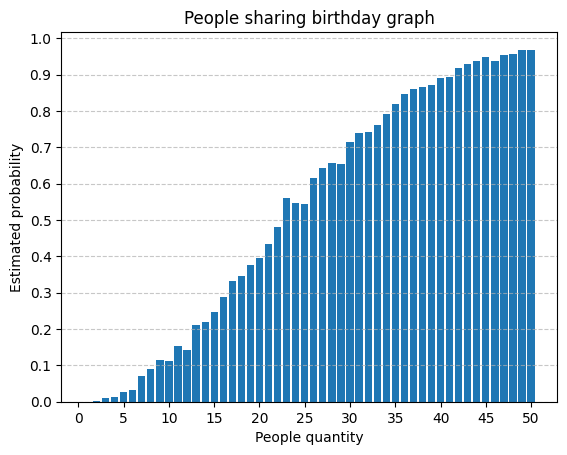

In [25]:
#5. Graphical Representation of Estimated Probabilities
import matplotlib.pyplot as plt
import numpy as np

people = list(range(1, 51))

plt.bar(people, probabilities)
plt.title("People sharing birthday graph")
plt.xlabel("People quantity")
plt.ylabel("Estimated probability")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 51, 5))
plt.show()